<center><h1>IA Project: Supervised Learning on Autism Dataset</h1></center>

# Introduction

## Dataset: Autism Dataset for Toddlers

**Source:** https://www.kaggle.com/datasets/vaishnavisirigiri/autism-dataset-for-toddlers

### Brief description
*Autistic Spectrum Disorder* (ASD) is a neurodevelopmental condition. This dataset centers on autism screening for toddlers. It aims to determine autistic traits and improve the classification of ASD cases. The dataset includes ten behavioral features and other individual characteristics proven effective in distinguishing ASD cases from controls.

### About the columns of the dataset
**Q-Chat-10 Summary:**

Responses to the ten questions (A1-A10) are mapped to binary values ("1" or "0"). For questions A1-A9, "Sometimes", "Rarely", or "Never" responses are assigned "1". For question A10, "Always", "Usually", or "Sometimes" responses are assigned "1". A score above 3 suggests potential ASD traits.

**Q-Chat-10 Questions:**
1. Does your child look at you when you call his/her name?
2. How easy is it for you to get eye contact with your child?
3. Does your child point to indicate that s/he wants something (e.g., a toy that is out of reach)?
4. Does your child point to share interest with you (e.g., pointing at an interesting sight)?
5. Does your child pretend (e.g., care for dolls, talk on a toy phone)?
6. Does your child follow where you’re looking?
7. If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them (e.g., stroking hair, hugging them)?
8. Would you describe your child’s first words as unusual?
9. Does your child use simple gestures (e.g., wave goodbye)?
10. Does your child stare at nothing with no apparent purpose?

# Imports
Importing all the important libraries for the project.
The library used for Machine Learning (`sklearn`) will be imported as needed along the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis
We downloaded the dataset from its [website](https://www.kaggle.com/datasets/vaishnavisirigiri/autism-dataset-for-toddlers) in a CSV format and imported it to a pandas dataframe.

We performed a small pre-processing for better consistency on the data analysis process, such as removing possible duplicates and transforming all text to lowercase to have a homogeneous dataset.

In [2]:
data = pd.read_csv("./dataset.csv")

# Transform data to lower case
data = data.apply(lambda x: x.astype(str).str.lower())

# Drop duplicates
data = data.drop_duplicates()

data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,no
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,white european,yes,no,family member,yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,hispanic,no,no,family member,yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,white european,no,yes,family member,yes


In [3]:
# Count entries for each value in each column
print(f"{data['Age_Mons'].value_counts()}\n")
print(f"{data['Qchat-10-Score'].value_counts()}\n")
print(f"{data['Sex'].value_counts()}\n")
print(f"{data['Ethnicity'].value_counts()}\n")
print(f"{data['Jaundice'].value_counts()}\n")
print(f"{data['Family_mem_with_ASD'].value_counts()}\n")
print(f"{data['Who completed the test'].value_counts()}\n")
print(f"{data['Class/ASD Traits'].value_counts()}")

Age_Mons
36    320
24     70
30     67
12     67
28     42
26     36
33     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     19
13     18
18     16
21     13
16     13
17     12
Name: count, dtype: int64

Qchat-10-Score
7     135
5     120
4     110
8      97
3      96
6      96
9      95
2      88
1      88
10     75
0      54
Name: count, dtype: int64

Sex
m    735
f    319
Name: count, dtype: int64

Ethnicity
white european    334
asian             299
middle eastern    188
south asian        60
black              53
hispanic           40
others             35
latino             26
mixed               8
pacifica            8
native indian       3
Name: count, dtype: int64

Jaundice
no     766
yes    288
Name: count, dtype: int64

Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64

Who completed the test
family member               1018
health care professional      29
self              

In [4]:
# Distribution by sex
print(data.groupby("Sex").size())

Sex
f    319
m    735
dtype: int64


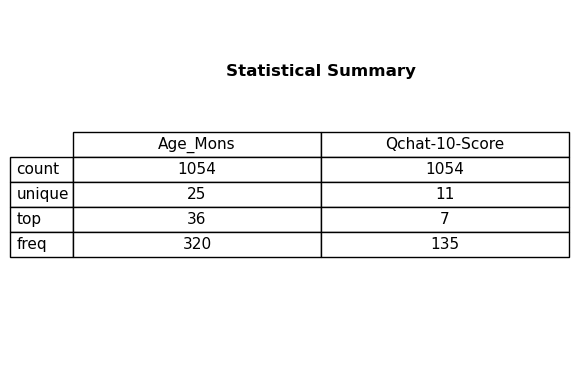

In [5]:
# Statistical Summary for Age and Qchat-10-Score
summary = data[['Age_Mons', 'Qchat-10-Score']].describe()

fig, ax = plt.subplots(1, 1)
ax.axis('off')
table = plt.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 1.5)
plt.title('Statistical Summary', y=0.8, weight='bold')
plt.show()

Class/ASD Traits
yes    728
no     326
Name: count, dtype: int64


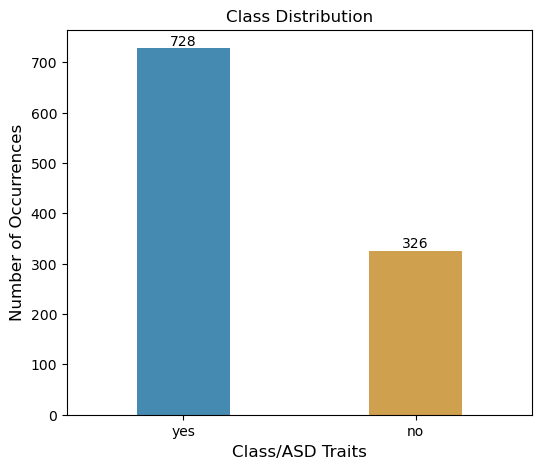

In [6]:
# Class Distribution
class_distribution = data['Class/ASD Traits'].value_counts()
print(class_distribution)

# Plotting the class distribution
plt.figure(figsize=(6,5))
class_plot = sns.barplot(x=class_distribution.index, y=class_distribution.values, alpha=0.8, palette="colorblind", width=0.4)

for i, value in enumerate(class_distribution.values):
    class_plot.text(i, value, value, ha='center', va='bottom')

plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class/ASD Traits', fontsize=12)

plt.show()

# Dataset Pre-processing

After analysing the dataset, we concluded that we needed to remove a few columns to have a better unbiasied data to train and test our dataset.

* The column ***"Who completed the test"*** was removed because we considered this factor to have no relevance on the current analysis.
</br>

* The column ***"Qchat-10-Score"*** was removed because it is a score that is calculated by adding the answers from the column Q1 to Q10. This meant that the results from the columns would be duplicated and therefore the ML model would be biased towards this factors.
</br>

* The column ***"Case_No"*** was removed after checking and deleting duplicates, since the Pandas Dataframe already keeps an index on the rows, and is not needed for our analysis.


In [7]:
# Delete column with case number
del data['Case_No']

# Delete column with Qchat-10-Score
del data['Qchat-10-Score']

# Delete column with who completed the test
del data['Who completed the test']

# Delete rows with missing values
data = data.dropna()

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,no
1,1,1,0,0,0,1,1,0,0,0,36,m,white european,yes,no,yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,yes
3,1,1,1,1,1,1,1,1,1,1,24,m,hispanic,no,no,yes
4,1,1,0,1,1,1,1,1,1,1,20,f,white european,no,yes,yes


In [8]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Ethnicity']= label_encoder.fit_transform(data['Ethnicity'])
data['Jaundice']= label_encoder.fit_transform(data['Jaundice'])
data['Family_mem_with_ASD']= label_encoder.fit_transform(data['Family_mem_with_ASD'])
data['Class/ASD Traits']= label_encoder.fit_transform(data['Class/ASD Traits'])


data['Sex'].unique()
data['Ethnicity'].unique()
data['Jaundice'].unique()
data['Family_mem_with_ASD'].unique()
data['Class/ASD Traits'].unique()

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,4,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,10,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,4,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,2,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,10,0,1,1


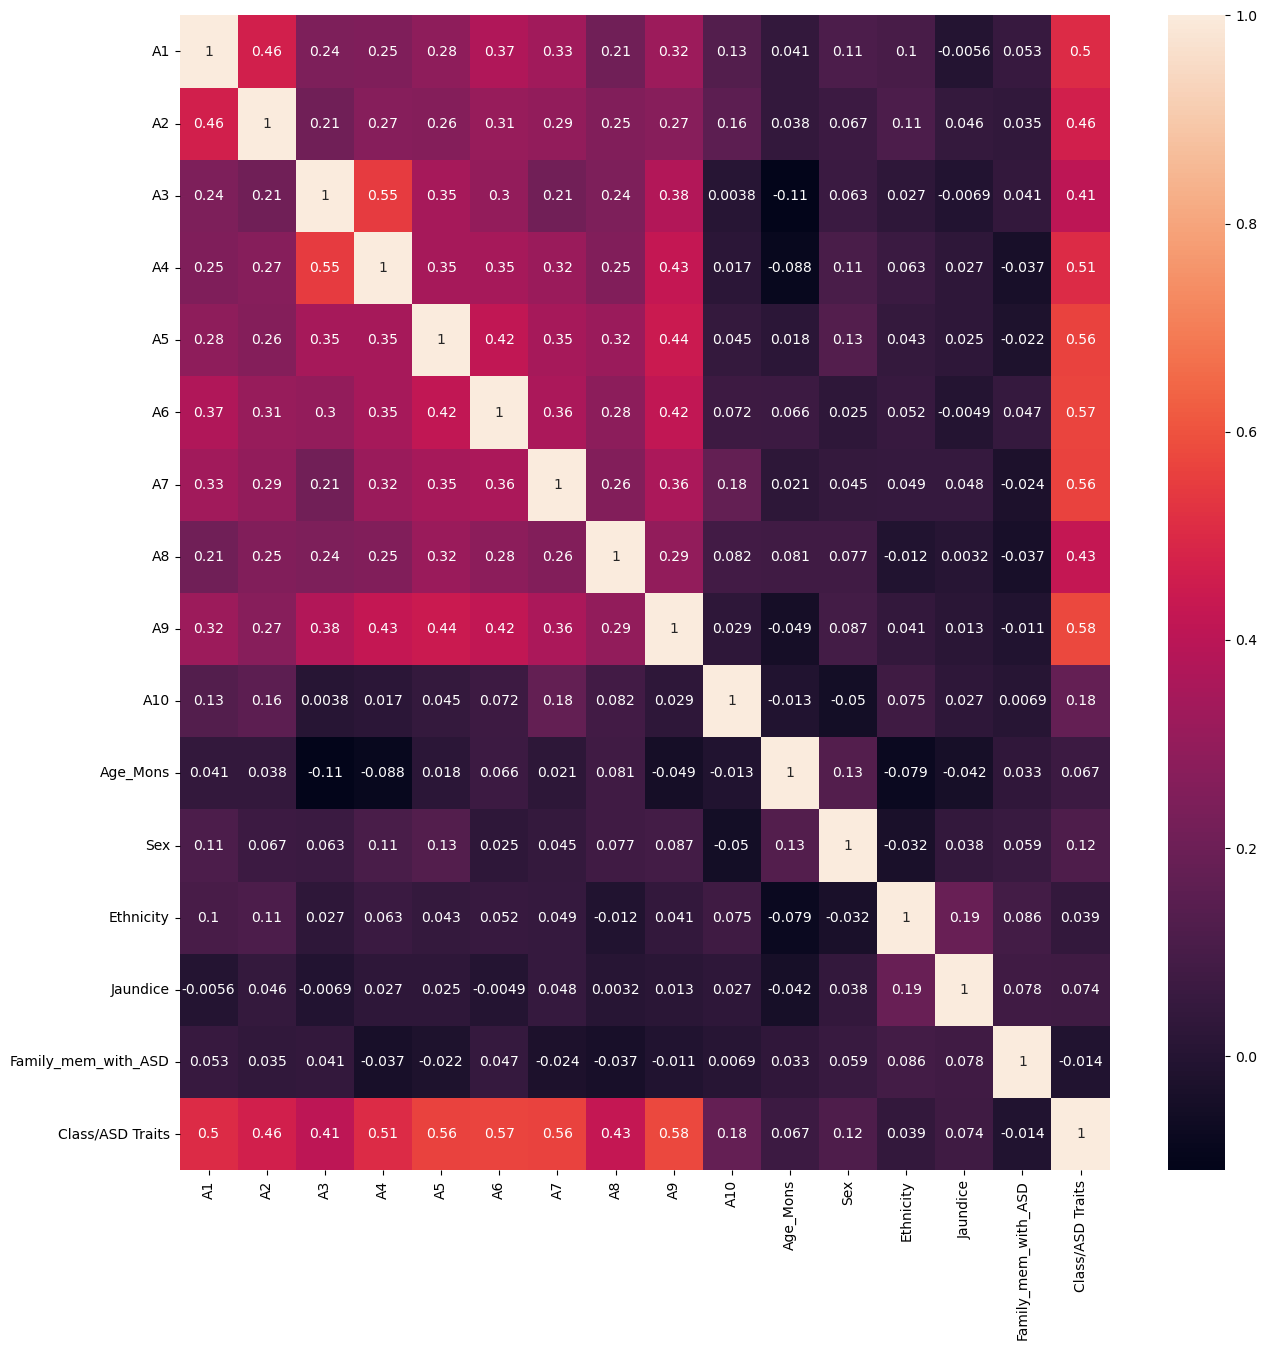

In [9]:
# Heatmap to show the correlation matrix of features
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Defining Training and Testing Sets

Our target column is the **"Class/ASD Traits"** column, that gives us the result if the child has or not ASD.

So, we divide the dataset into:
* **x - attribute set** (without the 'Class/ASD Traits' column)
* **y - class label** (exclusively with the 'Class/ASD Traits' column)

In [10]:
from sklearn.model_selection import train_test_split

x = data.drop(['Class/ASD Traits'], axis=1)
y = data['Class/ASD Traits']

# Convert categorical data to numeric using one-hot encoding
x = pd.get_dummies(x)

# Ensure the target variable is numeric
if y.dtype == 'Class/ASD Traits':
    y, _ = pd.factorize(y)

# Creating the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set dimensions: {x_train.shape}, {y_train.shape}")
print(f"\nTest set dimensions: {x_test.shape}, {y_test.shape}")
print(f"\nTraining set classes distribution:\n {y_train.value_counts(normalize=True)}")
print(f"\nTest set classes distribution:\n {y_test.value_counts(normalize=True)}")

Training set dimensions: (843, 49), (843,)

Test set dimensions: (211, 49), (211,)

Training set classes distribution:
 Class/ASD Traits
1    0.695136
0    0.304864
Name: proportion, dtype: float64

Test set classes distribution:
 Class/ASD Traits
1    0.672986
0    0.327014
Name: proportion, dtype: float64


# Machine Learning Models

In [11]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Decision Tree

Accuracy: 0.8530805687203792

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        69
           1       0.97      0.80      0.88       142

    accuracy                           0.85       211
   macro avg       0.84      0.88      0.85       211
weighted avg       0.89      0.85      0.86       211


Cross-Validation Scores: [0.87677725 0.85308057 0.87203791 0.87203791 0.81428571]

Average Cross-Validation Score: 0.8576438727149627


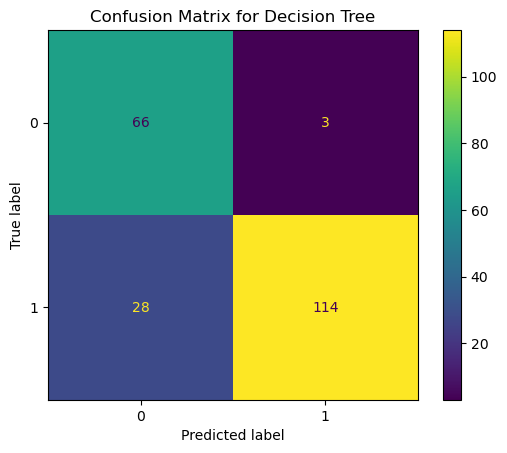

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit DecisionTreeClassifier with restricted depth
dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth to prevent overfitting
dt.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
report = metrics.classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:')
print(report)

# Perform cross-validation
scores = cross_val_score(dt, x, y, cv=5)
print(f'\nCross-Validation Scores: {scores}')
print(f'\nAverage Cross-Validation Score: {scores.mean()}')

# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Confusion Matrix for Decision Tree')
plt.show()

## SVM (Support Vector Machines)

Accuracy: 0.8530805687203792

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        69
           1       0.97      0.80      0.88       142

    accuracy                           0.85       211
   macro avg       0.84      0.88      0.85       211
weighted avg       0.89      0.85      0.86       211


Cross-Validation Scores: [1. 1. 1. 1. 1.]

Average Cross-Validation Score: 1.0


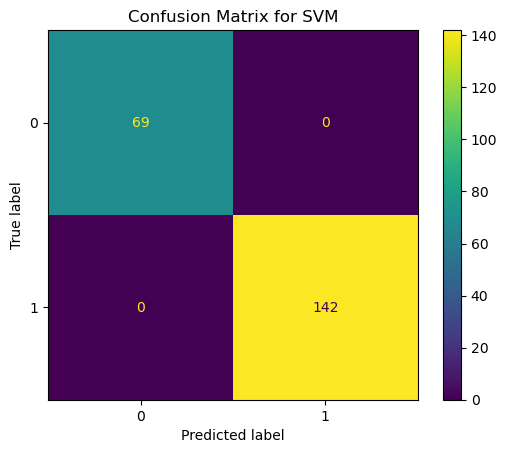

In [13]:
from sklearn.svm import SVC

# Create a SVM Classifier
clf = SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred_svm = clf.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
report = metrics.classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:')
print(report)

# Perform cross-validation
scores = cross_val_score(clf, x, y, cv=5)
print(f'\nCross-Validation Scores: {scores}')
print(f'\nAverage Cross-Validation Score: {scores.mean()}')

# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

## K-Nearest Neighbors (KNN)

Accuracy: 0.8530805687203792

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        69
           1       0.97      0.80      0.88       142

    accuracy                           0.85       211
   macro avg       0.84      0.88      0.85       211
weighted avg       0.89      0.85      0.86       211


Cross-Validation Scores: [0.9478673  0.94312796 0.92890995 0.96682464 0.9       ]

Average Cross-Validation Score: 0.9373459715639811


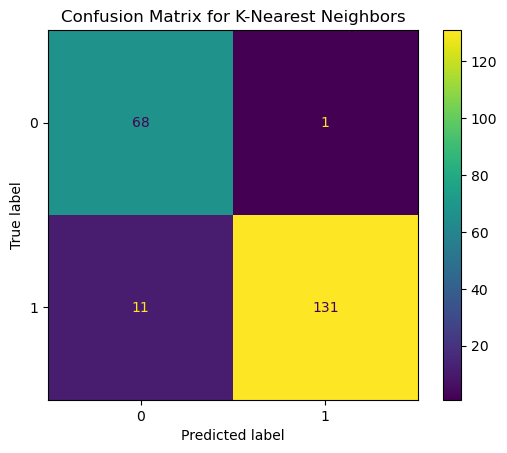

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred_knn = knn.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_dt)
report = metrics.classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy}')
print(f'\nClassification Report:')
print(report)

# Perform cross-validation
scores = cross_val_score(knn, x, y, cv=5)
print(f'\nCross-Validation Scores: {scores}')
print(f'\nAverage Cross-Validation Score: {scores.mean()}')

# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()